In [132]:
# Random Forest Modelling Classifier and Regressor

In [ ]:
import pandas as pd
import numpy as np

In [145]:
customer_input_train = pd.read_csv('X_train.csv')
customer_input_test = pd.read_csv('X_test.csv')
customer_target_train = pd.read_csv('Y_train.csv')
customer_target_test = pd.read_csv('Y_test.csv')

In [146]:
customer_input_train.columns

Index(['Unnamed: 0', 'gender:F', 'gender:M',
       'wealth_segment:Affluent Customer', 'wealth_segment:High Net Worth',
       'wealth_segment:Mass Customer', 'owns_car:No', 'owns_car:Yes',
       'state:NSW', 'state:QLD', 'state:VIC',
       'job_industry_category:Financial Services',
       'job_industry_category:Manufacturing', 'job_industry_category:Retail',
       'job_industry_category:Telecommunications',
       'job_industry_category:unknown_category',
       'job_industry_category : IT_Retail',
       'job_industry_category : Health_Entertainment',
       'job_industry_category:Agri_property', 'Age:15-16', 'Age:17',
       'Age:18-20', 'Age:21-24', 'Age:25-26', 'Age:27-28', 'Age:29-32',
       'Age:33-35', 'Age:36', 'Age:37-41', 'Age:42', 'Age:43-45', 'Age:46-48',
       'Age:49-51', 'Age:52', 'Age:53-55', 'Age:56-59', 'Age:60', 'Age:61-64',
       'Age:>=65', 'property_valuation : 1', 'property_valuation : 2-3',
       'property_valuation : 4', 'property_valuation : 5-6',
  

In [147]:
customer_input_train.shape

(2616, 92)

In [148]:
customer_input_test.shape

(2616, 2)

In [149]:
customer_target_train.shape

(872, 92)

In [150]:
customer_target_test.shape

(872, 2)

In [ ]:
# Dropping all the unwanted columns

In [151]:
customer_target_train = customer_target_train.drop('Unnamed: 0', axis = 1)
customer_input_train = customer_input_train.drop('Unnamed: 0', axis = 1)
customer_input_test = customer_input_test.drop('Unnamed: 0', axis = 1)
customer_target_test = customer_target_test.drop('Unnamed: 0', axis = 1)

In [152]:
customer_input_train

,gender:F,gender:M,wealth_segment:Affluent Customer,wealth_segment:High Net Worth,wealth_segment:Mass Customer,owns_car:No,owns_car:Yes,state:NSW,state:QLD,state:VIC,...,past_3_years_bike_related_purchases:82-85,past_3_years_bike_related_purchases:86-87,past_3_years_bike_related_purchases:88,past_3_years_bike_related_purchases:89,past_3_years_bike_related_purchases:90,past_3_years_bike_related_purchases:91,past_3_years_bike_related_purchases:92-95,past_3_years_bike_related_purchases:96,past_3_years_bike_related_purchases:97-98,past_3_years_bike_related_purchases:99
0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2612,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2613,0,1,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2614,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
customer_input_test

,profit_binary
0,1
1,0
2,0
3,1
4,0
...,...
2611,1
2612,1
2613,1
2614,0


In [154]:
customer_target_train

,gender:F,gender:M,wealth_segment:Affluent Customer,wealth_segment:High Net Worth,wealth_segment:Mass Customer,owns_car:No,owns_car:Yes,state:NSW,state:QLD,state:VIC,...,past_3_years_bike_related_purchases:82-85,past_3_years_bike_related_purchases:86-87,past_3_years_bike_related_purchases:88,past_3_years_bike_related_purchases:89,past_3_years_bike_related_purchases:90,past_3_years_bike_related_purchases:91,past_3_years_bike_related_purchases:92-95,past_3_years_bike_related_purchases:96,past_3_years_bike_related_purchases:97-98,past_3_years_bike_related_purchases:99
0,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
868,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
869,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
870,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Importing RandomForestClassifier and finding the optimal value for the number of estimators to use

In [155]:
from sklearn.ensemble import RandomForestClassifier

<ipython-input-156-c3ad68d125f6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(customer_input_train, customer_input_test)
<ipython-input-156-c3ad68d125f6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(customer_input_train, customer_input_test)
<ipython-input-156-c3ad68d125f6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(customer_input_train, customer_input_test)
<ipython-input-156-c3ad68d125f6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(customer_input_train, customer_input_te

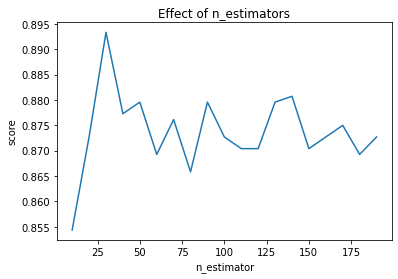

In [156]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    classifier.set_params(n_estimators=n)
    classifier.fit(customer_input_train, customer_input_test)
    scores.append(classifier.score(customer_target_train, customer_target_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
# We find the classification score  rises high to 0.88 with 31 estimators and then falls down.THerefore we use n_estimators = 31

In [234]:
classifier = RandomForestClassifier(n_estimators = 31)

In [235]:
classifier.fit(customer_input_train,customer_input_test)

<ipython-input-235-39379f8a1f32>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(customer_input_train,customer_input_test)


RandomForestClassifier(n_estimators=31)

In [ ]:
# y_pred contains the predicted values

In [236]:
y_pred = classifier.predict(customer_target_train)

In [237]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [238]:
y_pred = pd.DataFrame(y_pred)

In [239]:
y_pred.columns = ['profit_binary']

In [ ]:
# predicted value

In [240]:
y_pred

,profit_binary
0,1
1,0
2,1
3,0
4,0
...,...
867,1
868,0
869,1
870,0


In [ ]:
# Actual value

In [242]:
customer_target_test

,profit_binary
0,1
1,0
2,1
3,0
4,0
...,...
867,1
868,0
869,1
870,0


In [243]:
#customer_target_test = customer_target_test.drop('Unnamed: 0', axis = 1)

In [ ]:
# Classification report for the prediction is as follows

In [244]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(customer_target_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(customer_target_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(customer_target_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[369  55]
 [ 43 405]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       424
           1       0.88      0.90      0.89       448

    accuracy                           0.89       872
   macro avg       0.89      0.89      0.89       872
weighted avg       0.89      0.89      0.89       872

Accuracy: 0.8876146788990825


In [ ]:
# Now lets Find feature importance  for all the features present.

In [245]:
feaure_imp = pd.Series(classifier.feature_importances_,index = customer_input_train.columns).sort_values(ascending= False)
feaure_imp

owns_car:No                               0.024637
wealth_segment:Mass Customer              0.024065
owns_car:Yes                              0.023770
wealth_segment:High Net Worth             0.022458
state:NSW                                 0.022353
                                            ...   
past_3_years_bike_related_purchases:51    0.002932
past_3_years_bike_related_purchases:21    0.002651
past_3_years_bike_related_purchases:91    0.002596
Age:15-16                                 0.001634
Age:>=65                                  0.000723
Length: 91, dtype: float64

In [246]:
feaure_imp.head(60)

owns_car:No                                     0.024637
wealth_segment:Mass Customer                    0.024065
owns_car:Yes                                    0.023770
wealth_segment:High Net Worth                   0.022458
state:NSW                                       0.022353
wealth_segment:Affluent Customer                0.022016
property_valuation : 7-9                        0.022011
gender:F                                        0.021355
job_industry_category : Health_Entertainment    0.020888
tenure:7-11                                     0.020519
job_industry_category:Financial Services        0.020516
job_industry_category:Manufacturing             0.020392
Age:37-41                                       0.020275
state:VIC                                       0.020104
gender:M                                        0.019863
job_industry_category:unknown_category          0.019508
past_3_years_bike_related_purchases:69-77       0.019051
state:QLD                      

In [ ]:
# We use Random forest regressor to predict the profit from each customer for which Mean squared error is used as an evaluation metric

In [47]:
# Using random forest regressor to predict profit from customer

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
import matplotlib.pyplot as plt

In [ ]:
# We use a dataset which includes the variable profit rather than profit_binary as this is a regression problem.

In [113]:
X_train = pd.read_csv('rf_X_train.csv')
Y_train = pd.read_csv('rf_Y_train.csv')
X_test = pd.read_csv('rf_X_test.csv')
Y_test = pd.read_csv('rf_Y_test.csv')

In [114]:
X_train.shape

(2616, 27)

In [115]:
Y_train.shape

(2616, 2)

In [116]:
X_test.shape

(872, 27)

In [117]:
Y_test.shape

(872, 2)

In [ ]:
# Dropping all index columns

In [118]:
X_train = X_train.drop('Unnamed: 0',axis = 1)
Y_train = Y_train.drop('Unnamed: 0',axis = 1)
X_test = X_test.drop('Unnamed: 0',axis = 1)
Y_test = Y_test.drop('Unnamed: 0',axis = 1)

In [ ]:
# The list_price and standard_cost variables are dropped because they are not present in the new_cust dataset and shouldnt be included in the analysis

In [119]:
X_train = X_train.drop(columns = ['list_price','standard_cost'],axis = 1)
X_test = X_test.drop(columns = ['list_price','standard_cost'],axis = 1)

In [ ]:
# Fitting and predicting profit from each customer using Random Forest REgressor

In [120]:
regressor = RandomForestRegressor()

In [121]:
regressor.fit(X_train,Y_train)

<ipython-input-121-4d17c24ccad2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [122]:
y_reg_pred = regressor.predict(X_test)

In [ ]:
# y_reg_pred contains the predicted values

In [123]:
y_reg_pred

array([3190.16383049, 3408.13017439, 2853.82726098, 3690.6951    ,
       4779.15335244, 3298.00083049, 4947.92623049, 2346.38518293,
       3493.67292683, 2539.74603049, 2523.96556262, 3230.41756667,
       2839.18674675, 3599.69926098, 3010.81542195, 4019.39418293,
       2615.45283537, 3366.76159146, 2512.76783049, 2861.63332195,
       2397.8441    , 2274.4054    , 2854.81765244, 3009.54293049,
       3591.10595244, 3289.9726989 , 3196.28294146, 2386.44538811,
       4020.92809146, 3432.88709146, 2982.99646098, 2881.53359146,
       3086.44512195, 2869.42567439, 3052.4529    , 2888.0997935 ,
       4080.82129146, 3086.47191341, 3232.39209715, 3005.51112195,
       3914.74696098, 3372.5579439 , 3437.08648293, 3399.05182195,
       3574.6742    , 3107.09083049, 4332.06187439, 3492.10463049,
       2195.87000488, 3165.05338293, 2718.12093049, 2797.83061341,
       3148.16632195, 2583.79813333, 2737.76921829, 2975.96745244,
       3739.23980488, 3078.03339146, 2628.22115244, 4021.27229

In [127]:
from sklearn import metrics

In [ ]:
# Using evaluation metrics to determine the accuaracy of prediction

In [131]:
print('Mean absolute error',metrics.mean_absolute_error(Y_test,y_reg_pred))
print('Mean squared error',metrics.mean_squared_error(Y_test,y_reg_pred))
print('root mean squared error',np.sqrt(metrics.mean_squared_error(Y_test,y_reg_pred)))


Mean absolute error 1469.0746420842459
Mean squared error 3396857.2171113575
root mean squared error 1843.056487770073


In [ ]:
# Variables Feature_importance for regression problem is calculated as below.
# Age,tenure and property_valuation are of highest importance for prediction

In [125]:
feaure_imp_reg = pd.Series(regressor.feature_importances_,index = X_train.columns).sort_values(ascending= False)
feaure_imp_reg

Age                                         0.227474
tenure                                      0.171450
property_valuation                          0.166726
job_industry_category:Financial Services    0.031713
job_industry_category:Manufacturing         0.029432
job_industry_category:Health                0.028635
wealth_segment:Affluent Customer            0.027406
wealth_segment:Mass Customer                0.027108
job_industry_category:unknown_category      0.025662
state:VIC                                   0.025008
wealth_segment:High Net Worth               0.024963
gender:M                                    0.024385
state:NSW                                   0.024161
job_industry_category:Retail                0.023935
gender:F                                    0.023154
owns_car:Yes                                0.022457
owns_car:No                                 0.022227
state:QLD                                   0.021817
job_industry_category:IT                    0.